In [8]:
import tslearn
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("GunPointOldVersusYoung")
y_train = y_train - 1
y_test = y_test - 1

In [9]:
SX_list = []
for i in range(len(X_train)):
    y0 = np.cumsum(X_train[i])
    y0_lag = [val for val in y0 for i in range(2)]
    y0_lag.pop()
    y0_lead = [val for val in y0 for i in range(2)]
    y0_lead.pop(0)
    X0 = np.zeros((2,len(y0_lag)))
    X0[0] = y0_lag
    X0[1] = y0_lead
    X0 = np.transpose(X0)
    # print(X0)
    import iisignature as sig
    SX = sig.sig(X0,2)
    SX_list.append(SX)

In [10]:
SX_list_test = []
for i in range(len(X_test)):
    y0 = np.cumsum(X_test[i])
    y0_lag = [val for val in y0 for i in range(2)]
    y0_lag.pop()
    y0_lead = [val for val in y0 for i in range(2)]
    y0_lead.pop(0)
    X0 = np.zeros((2,len(y0_lag)))
    X0[0] = y0_lag
    X0[1] = y0_lead
    X0 = np.transpose(X0)
    # print(X0)
    import iisignature as sig
    SX = sig.sig(X0,2)
    SX_list_test.append(SX)

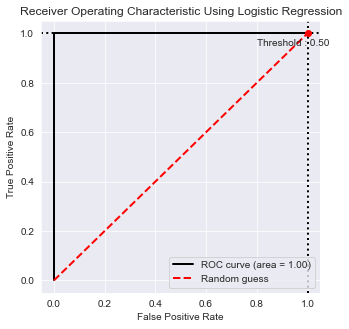

score is 0.5238095238095238


In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(SX_list, y_train)
y_pred = clf.predict_proba(SX_list_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(SX_list_test, y_test)
print("score is " + str(score))

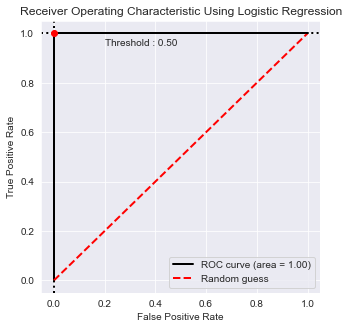

score is 1.0


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(SX_list, y_train)
y_pred = clf.predict_proba(SX_list_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(SX_list_test, y_test)
print("score is " + str(score))

In [17]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

1.0
